In [2]:
#SENTIMENT ANALYSIS OF MUSICAL INSTRUMENTS REVIEWS
#Krishan Goyal (krishan30081993@gmail.com)

#Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score


In [4]:
#Importing data

data = pd.read_csv('Musical_Instruments_5.csv')
data.head()

,reviewerID,asin,reviewerName,helpful/0,helpful/1,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...",0,0,"Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,13,14,The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",1,1,The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",0,0,Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,0,0,This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [5]:

data.shape

(10261, 10)

In [6]:
data.isna().sum()

reviewerID         0
asin               0
reviewerName      27
helpful/0          0
helpful/1          0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [7]:
#DROPPING USELESS FEATURES
data = data.drop(['reviewerID', 'asin','reviewerName', 'unixReviewTime', 'helpful/1','helpful/0', 'reviewTime' ], axis = 1)
data.head()

,reviewText,overall,summary
0,"Not much to write about here, but it does exac...",5,good
1,The product does exactly as it should and is q...,5,Jake
2,The primary job of this device is to block the...,5,It Does The Job Well
3,Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY
4,This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.


In [8]:
data.isna().sum()

reviewText    7
overall       0
summary       0
dtype: int64

In [9]:
data['reviewText'].fillna('Null', inplace = True)
data.isna().any()

reviewText    False
overall       False
summary       False
dtype: bool

In [10]:
data['overall'].unique()

array([5, 3, 4, 2, 1])

In [11]:
#Classifying rating into Good and Bad
def rating(overall):
    if (int(overall <= 3)):
        return 0
    else:
        return 1
        
data['rating'] = data['overall'].apply(rating)
data = data.drop(['overall'], axis = 1)
data.head()

,reviewText,summary,rating
0,"Not much to write about here, but it does exac...",good,1
1,The product does exactly as it should and is q...,Jake,1
2,The primary job of this device is to block the...,It Does The Job Well,1
3,Nice windscreen protects my MXL mic and preven...,GOOD WINDSCREEN FOR THE MONEY,1
4,This pop filter is great. It looks and perform...,No more pops when I record my vocals.,1


In [12]:
#Adding ratings (0-bad/1-good reviews)
data.rating.unique()


array([1, 0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


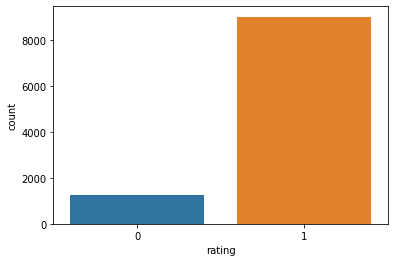

In [13]:
#Plotting Rating Counts
sns.countplot(data.rating)


In [14]:
#Concatinating Review text and Summary Features
data['reviewText'] = data['reviewText'] + data['summary']
data = data.drop(['summary'], axis = 1)
data.head()

,reviewText,rating
0,"Not much to write about here, but it does exac...",1
1,The product does exactly as it should and is q...,1
2,The primary job of this device is to block the...,1
3,Nice windscreen protects my MXL mic and preven...,1
4,This pop filter is great. It looks and perform...,1


In [15]:
x = pd.DataFrame(data['reviewText'])
y = pd.DataFrame(data.rating)
data.reviewText = data.reviewText.astype('str')

In [16]:
#IMPORTING LIBRARIES
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [17]:
#Removing stop words
#Removing punctuations
#Tokenization
#Lemmatization


nlp = spacy.load("en_core_web_sm")
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

            
def furnished(text):
    final_text = []
    for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)


            
data.reviewText = data.reviewText.apply(furnished)

In [18]:
data.reviewText.describe()

count                      10261
unique                     10256
top       good stringsfive stars
freq                           3
Name: reviewText, dtype: object

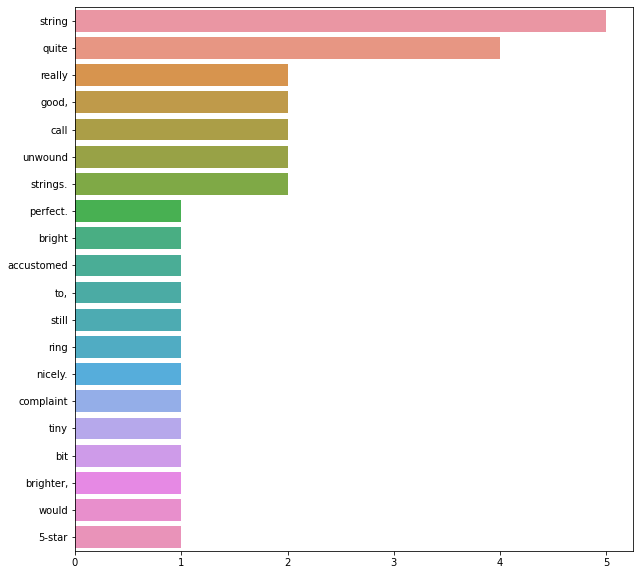

In [19]:
for i in data.reviewText:
    global text
    text = i.split()
    
counter=Counter(text)
most=counter.most_common()

x, y= [], []
for word,count in most[:20]:
    if (word not in stop):
        x.append(word)
        y.append(count)
plt.figure(figsize = (10,10))     
sns.barplot(x=y,y=x)

In [20]:
data.head()

,reviewText,rating
0,"much write here, exactly supposed to. filter p...",1
1,product exactly quite affordable.i realized do...,1
2,primary job device block breath would otherwis...,1
3,nice windscreen protects mxl mic prevents pops...,1
4,pop filter great. look performs like studio fi...,1


In [21]:
#DATA SPLITTING
x_train,x_test,y_train,y_test = train_test_split(data.reviewText,data.rating,test_size = 0.2 , random_state = 0)


In [22]:

#BagOfWords
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
bow_x_train = cv.fit_transform(x_train)
bow_x_test = cv.transform(x_test)

print('bow_x_train:',bow_x_train.shape)
print('bow_x_test:',bow_x_test.shape)

bow_x_train: (8208, 590454)
bow_x_test: (2053, 590454)


In [23]:
#TF-IDF 
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))

tfidf_x_train =tv.fit_transform(x_train)
tfidf_x_test =tv.transform(x_test)

print('tfidf_x_train:',tfidf_x_train.shape)
print('tfidf_x_test:',tfidf_x_test.shape)

tfidf_x_train: (8208, 590454)
tfidf_x_test: (2053, 590454)


In [24]:
#NaiveBayesApllication
nb = MultinomialNB()

#fit
bow = nb.fit(bow_x_train, y_train)
tfidf = nb.fit(tfidf_x_train, y_train)

#predict
bow_predict = nb.predict(bow_x_test)
tfidf_predict = nb.predict(tfidf_x_test)

#accuracy
nb_bow = accuracy_score(y_test, bow_predict)
nb_tfidf = accuracy_score(y_test,tfidf_predict)

print('nb bow accuracy:', nb_bow)
print('tfidf accuracy:', nb_tfidf)

nb bow accuracy: 0.8894301022893327
tfidf accuracy: 0.8889430102289333


In [25]:
#RandomForestApplication
rf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

#fit
bow = rf.fit(bow_x_train, y_train)
tfidf = rf.fit(tfidf_x_train, y_train)

#predict
bow_predict = rf.predict(bow_x_test)
tfidf_predict = rf.predict(tfidf_x_test)

#accuracy
rf_bow = accuracy_score(y_test, bow_predict)
rf_tfidf = accuracy_score(y_test,tfidf_predict)

print('rf bow accuracy:', rf_bow)
print('rf tfidf accuracy:', rf_tfidf)

rf bow accuracy: 0.8889430102289333
rf tfidf accuracy: 0.8889430102289333


In [26]:
#Linear SVC
ls =  LinearSVC()

#fit
bow = ls.fit(bow_x_train, y_train)
tfidf = ls.fit(tfidf_x_train, y_train)

#predict
bow_predict = ls.predict(bow_x_test)
tfidf_predict = ls.predict(tfidf_x_test)

#accuracy
ls_bow = accuracy_score(y_test, bow_predict)
ls_tfidf = accuracy_score(y_test,tfidf_predict)

print('ls bow accuracy:', ls_bow)
print('ls tfidf accuracy:', ls_tfidf)

ls bow accuracy: 0.8884559181685339
ls tfidf accuracy: 0.8899171943497322


In [28]:

#Logistic Regression
lr = LogisticRegression(random_state=0)

#Fit
bow = lr.fit(bow_x_train, y_train)
tfidf = lr.fit(tfidf_x_train, y_train)

#Predict
bow_predict = lr.predict(bow_x_test)
tfidf_predict = lr.predict(tfidf_x_test)

#Accuracy
lr_bow = accuracy_score(y_test, bow_predict)
lr_tfidf = accuracy_score(y_test,tfidf_predict)

print('lr bow accuracy:', lr_bow)
print('lr tfidf accuracy:', lr_tfidf)

lr bow accuracy: 0.8899171943497322
lr tfidf accuracy: 0.8889430102289333


In [29]:
data = {'accuracy': [nb_bow * 100, nb_tfidf * 100, rf_bow * 100, rf_tfidf * 100, lr_bow * 100, lr_tfidf * 100, ls_tfidf * 100, ls_bow * 100],
                   'model': ['Naive bayes BOW', 'Naive bayes TF-IDF', 'Random Forest BOW', 'Random Forest TF-IDF', 
                                'logit BOW', 'logit TF-IDF', 'SVM BOW', 'SVM TF-IDF']}
df = pd.DataFrame(data, columns = ['accuracy', 'model'])
df.head(8)

,accuracy,model
0,88.943010,Naive bayes BOW
1,88.894301,Naive bayes TF-IDF
2,88.894301,Random Forest BOW
3,88.894301,Random Forest TF-IDF
4,88.991719,logit BOW
5,88.894301,logit TF-IDF
6,88.991719,SVM BOW
7,88.845592,SVM TF-IDF


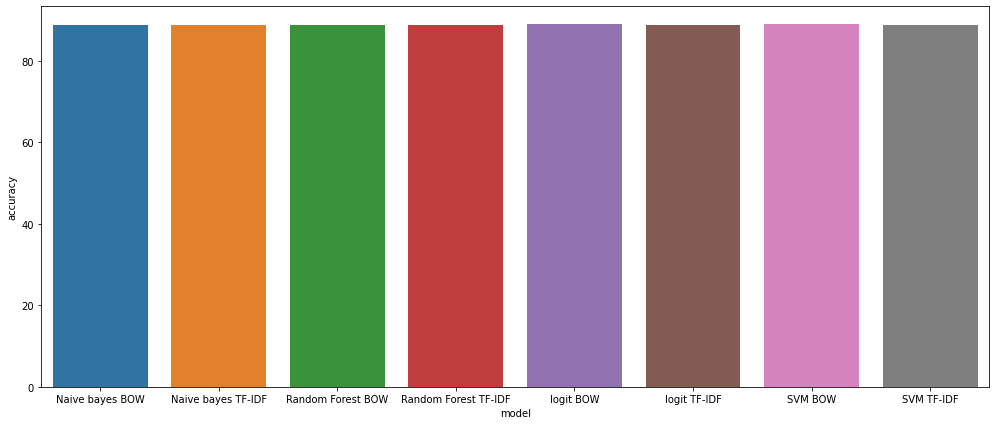

In [30]:
#Plotting Models Accuracy

plt.figure(figsize = (17,7))
sns.barplot(y = df.accuracy, x = df.model)